![](https://www.flyability.com/hs-fs/hubfs/SEO%20content/Commercial%20drones/commercial-drones-parrot-anafi-usa.png?width=1200&name=commercial-drones-parrot-anafi-usa.png)

# Quadcopter Dynamics and Control

by Kevin J. Walchko, Phd

July 2021

---

# References

- [Modeling Vehicle Dynamics – Quadcopter Equations of Motion](https://charlestytler.com/quadcopter-equations-motion/)
- Matlab: [6DOF (Euler Angles)](https://www.mathworks.com/help/aeroblks/6dofeulerangles.html)
- [EMAX MT2204 2300KV Motor](https://oscarliang.com/emax-mt2204-mt1806-motor-quadcopter-1804/)
- [Spacecraft and Aircraft Dynamics](http://control.asu.edu/Classes/MMAE441/Aircraft/441Lecture9.pdf)

## Simulink Reference

Using the 6DoF block as an idea for how to build my drone model ... not done yet.

![](pics/simulink-block.gif)

![](pics/simulink-frame.png)

## Variables and Units

| Variable         | Units   | Definition |
|------------------|:-------:|:-----------|
| $F_i$      | N       | Force      |
| $\tau_i$   | Nm      | Moment     |
| $\gamma$   | m       | torque/force ratio |
| $n$        | rpm     | motor shaft speed |
| $\omega$   | rad/sec | rotation rate of the drone body $\begin{bmatrix} p & q & r \end{bmatrix}^T$ |
| $L$        | m       | distance from CoM to motor |
| $J$        | $kg.m^2$| rotational inertia |
| $I_m$      | $kg.m^2$| motor inertia |
| $v$        | m/sec   | linear body velocity, $\begin{bmatrix} u & v & w \end{bmatrix}^T$ |


| Symbol | Description                                                          |
|:-------|:---------------------------------------------------------------------|
| $vec_{frame}$   | Vector measured in a reference frame                                 |
| $R_{to}^{from}$ | Rotation matrix which transforms from one reference frame to another |


## Motion

The diagram below shows the direction of the propellers spining. By increasing the speed and decreasing the speed of the combinations of motors, the following can be achieved: up, down, roll, pitch, and rotate about z-axis. Note, that the system is under actuated, since there is no direct way to move in the horizontal plane without some combination of roll/pitch first. Thus there is 1 DoF for z-axis translational motion and 3 DoF for rotational motion for a total of 4 DoF.

<img src="pics/movement.jpg" width="50%"> </td>

Remeber, the diagrams above show propellor spin direction. Since the propellor is pushing on the air as it spins, this causes the resulting torque transfered to the aircraft frame to be in the opposite direction.

### Motors

$$
F_i = k_F n_i^2 \\
\tau_i = k_M n_i^2 + I_m \dot n_i
$$

So we can simplify the motor torque by with the assumption, the motor speeds are generally constant and only change speeds over a very short time:

$$
\dot n_i \approx 0 \\ 
\tau_i = k_M n_i^2 + I_m \dot n_i \to \tau_i = k_M n_i^2
$$

Also, for deriving equations, since there is a relationship between forces and
torques, we can write:

$$
\frac {\tau_i}{F_i} = \frac {k_M n_i^2}{k_F n_i^2} = \frac {k_M}{k_F} = \gamma \to \tau_i = \gamma F_i
$$

Note that although the motor constants $k_M$ and $k_F$ are shown as constant, they do vary with air density, temperature, friction, etc.


## Propeller

<img src="pics/propeller-forces.jpg" width="35%" >

The force produced by a propeller blade is lift ($l_i$) and is located at the center of pressure ($C_i$) of each blade. The total thrust ($t$) is the sum of the lift of each blade. The torque produced by the aerodynamic drag which acts in the opposite direction as the motor angular velocity ($n$).

## Dynamics

![](pics/quadcopter.png )

$$
\begin{align*}
\Phi &= \begin{bmatrix} \vec{p} && \vec{v} && \omega && q \end{bmatrix}_I^T \\
\dot \Phi &= f_b(\Phi, u)
\end{align*}
$$

$$
\vec{p}_I = R_I^b \vec{p}_b \\
\vec{v}_I = R_I^b \vec{v}_b
$$

### Translational

Starting with Newton's Law:

$$
m \frac{dv}{dt} = m \dot v = F_I \\
$$

$$
m \frac{dv}{dt} \bigg|_I = m \left( \dot v_b + \omega \times v_b \right) = F_b
$$

$$
m \left( \dot v_b + \omega \times v_b \right) =  F_T - m \vec{g_b} \\
\dot v_b = F_T / m - \vec{g}_b - \omega \times v_b
$$

where $F_T$ is the thrust vector given by:

$$
F_T = \begin{bmatrix} 0 && 0 && -F_1 - F_2 - F_3 - F_4 \end{bmatrix}^T
$$

The gravity term is given by:

$$
\vec{g}_b = R_{n}^{b} \vec{g}_n = \begin{bmatrix} 
    c_{\theta}c_{\psi} & c_{\theta}s_{\psi} & -s_{\theta} \\ 
    -c_{\theta}s_{\psi}+s_{\phi}s_{\theta}c_{\psi} & c_{\phi}c_{\psi}+s_{\phi}s_{\theta}s_{\psi} & s_{\phi}c_{\theta} \\
    s_{\phi}s_{\psi}+c_{\phi}s_{\theta}c_{\psi} & -s_{\phi}c_{\psi}+c_{\phi}s_{\theta}s_{\psi} & c_{\phi}c_{\theta} \end{bmatrix} 
\begin{bmatrix} 0 \\0\\g \end{bmatrix} \\
\vec{g}_b = \begin{bmatrix} 
    -mg\sin(\theta) \\
    g\sin(\phi)\cos(\theta) \\
    mg\cos(\phi)\cos(\theta) 
\end{bmatrix} 
$$

### Rotational

Let's start with assuming the drone is symetrical, then the inertia ($J$) is:

$$
J = 
\begin{bmatrix}
  J_x & 0 & 0 \\
  0 & J_y & 0 \\
  0 & 0 & J_z
\end{bmatrix}
$$

Additionally, if we assume the drone is in an X shape, then $J_x = J_y$. However, just in case it isn't because of payload, we won't simplify the equations below. 

Euler's Equation in the *body frame*: 

$$
J \dot \omega + \omega \times (J \omega) = \tau \\
J \dot \omega = \tau - \omega \times (J \omega) \\
\dot \omega = J^{-1}[\tau - \omega \times (J \omega)] \\
\dot \omega = 
  \begin{bmatrix}
    \tau_x/J_x \\
    \tau_y/J_y \\
    \tau_z/J_z \\
  \end{bmatrix} - 
  \begin{bmatrix}
    \frac {J_y - J_z}{J_x} q \cdot r \\
    \frac {J_z - J_x}{J_y} p \cdot r \\
    \frac {J_x - J_y}{J_z} p \cdot q \\
  \end{bmatrix}
$$

where $\omega^b = \begin{bmatrix} p & q & r \end{bmatrix}^T$. Now you can define your control input as a combination of motor forces, motor locations, and force/torque ratios. Use  $\tau_i = \gamma F_i$ in the derivation. Looking at the motor forces in the free body diagram, the table below shows the motor forces interaction with rotational torques.


| Torque   | F1 | F2 | F3 | F4 |
|----------|----|----|----|----|
| $\tau_x$ | -  | +  | +  | -  |
| $\tau_y$ | +  | -  | -  | +  |
| $\tau_z$ | +  | +  | -  | -  |

$$
\tau =
\begin{bmatrix} 
  -L &  L &  L & -L \\
   L & -L &  L & -L \\
   \gamma &  \gamma & -\gamma & -\gamma
\end{bmatrix}
\begin{bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{bmatrix} \\
F_i = k_f \cdot n_i^2
$$

where $L$ is the distance between a motor and an axis. The assumption is the quadcopter is in an X layout and each motor is the same distance from the x-axis or y-axis and therefore produces the same torque. Torque about the z-axis is due to the aerodynamic drag force and acts in the opposite direction of the rotor spin.

## Control Law

Using the dynamics of the quadcopter and its motor forces, the table below gives the torque directions for commands.

| Command | F1 | F2 | F3 | F4 |
|---------|----|----|----|----|
| Roll    | -  | +  | +  | -  |
| Pitch   | +  | -  | +  | -  |
| Yaw     | +  | +  | -  | -  |

Using the above table, we can define a matrix that converts errors into motor speeds.

$$
\begin{align*} 
u &= u_{trim} + u_{\Delta attitudeError} + u_{\Delta positionError} \\
\begin{bmatrix} n_1 && n_2 && n_3 && n_4 \end{bmatrix}^T  &= M \cdot cmds \\
  &= 
\begin{bmatrix}
    1 && -1 &&  1 &&  1 && 1 \\
    1 &&  1 && -1 &&  1 && 1 \\
    1 &&  1 &&  1 && -1 && 1 \\
    1 && -1 && -1 && -1 && 1 \\
\end{bmatrix}
\begin{bmatrix} 
    \sqrt{\frac{mg}{4 k_f}} \\
    - kp \cdot \phi - kd \cdot \omega_x \\
    - kp \cdot \theta - kd \cdot \omega_z \\
    - kp \cdot \psi - kd \cdot \omega_y \\
    kp \cdot z + kd \cdot \dot z
\end{bmatrix}
\end{align*}
$$

where $u_{trim}$ is the motor force needed to negate the mass of the quadcopter and hold it at a constant altitude. Basically, each motor (4) needs to account for a quarter of the quadcopter's weight.

$$
mg/4 - F_T = 0 \\
F_T = mg/4 \\
k_f n^2 = mg/4 \\
n = \sqrt{\frac{mg}{4 k_f}}
$$

The $attitudeError$ and $positionError$ are based on commands for position or orientation of the quadcopter.

## Euler Angles

To update the orientation of the quadcopter, you *could* use the following relationship.

$$
\begin{bmatrix} \dot \phi \\ \dot \theta \\ \dot \psi \end{bmatrix} = 
\begin{bmatrix} 
    1 && \sin \phi \tan \theta && \cos \phi \tan \theta \\
    0 && \cos \phi && -\sin \phi \\
    0 && \sin \phi \sec \theta && \cos \phi \sec \theta
\end{bmatrix}
\begin{bmatrix} p \\ q \\ r \end{bmatrix}
$$

where $\theta \ne \pi/2$ and if both $\phi$ and $\theta$ are close to 0 (when quadcopter is hovering), then the matrix becomes the identify matrix. 

## Quaternions

Integrating Euler angles using the above can lead to issues, so typically you choose to use quaternions instead. Here I will use the Hamilton definition and not the JPL definition for a quaternion.

$$
q = [ w, x, y, z ] \\
x_{inertial} = q \otimes x_{body} \otimes q^* \\
\dot q = \frac {1}{2} q \otimes \omega
$$

## SciPy Integration

`solve_ivp` can use various methods to perform integration.

- **method:** string or OdeSolver, *optional*

    - ‘RK45’ (default): Explicit Runge-Kutta method of order 5(4) [1]. The error is controlled assuming accuracy of the fourth-order method, but steps are taken using the fifth-order accurate formula (local extrapolation is done). A quartic interpolation polynomial is used for the dense output [2]. Can be applied in the complex domain.

    - ‘RK23’: Explicit Runge-Kutta method of order 3(2) [3]. The error is controlled assuming accuracy of the second-order method, but steps are taken using the third-order accurate formula (local extrapolation is done). A cubic Hermite polynomial is used for the dense output. Can be applied in the complex domain.

    - ‘DOP853’: Explicit Runge-Kutta method of order 8 [13]. Python implementation of the “DOP853” algorithm originally written in Fortran [14]. A 7-th order interpolation polynomial accurate to 7-th order is used for the dense output. Can be applied in the complex domain.

    - ‘Radau’: Implicit Runge-Kutta method of the Radau IIA family of order 5 [4]. The error is controlled with a third-order accurate embedded formula. A cubic polynomial which satisfies the collocation conditions is used for the dense output.

    - ‘BDF’: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation [5]. The implementation follows the one described in [6]. A quasi-constant step scheme is used and accuracy is enhanced using the NDF modification. Can be applied in the complex domain.

    - ‘LSODA’: Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.

```
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 8
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.    , 0.0001])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -6.07867133e-12],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.21573427e-07],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])
 y_events: None
```

In [77]:
import numpy as np
from numpy import cos, sin
from matplotlib import pyplot as plt
from collections import deque

In [2]:
from scipy.integrate import odeint, solve_ivp as rk45
from squaternion import Quaternion
from pprint import pprint
from tqdm import tqdm

In [3]:
rpm2w = 2*np.pi/60
w2rpm = 60/2/np.pi

rad2deg = 180/np.pi
deg2rad = np.pi/180

def R321(a,b,c, degrees=False):
    """Returns a rotation matrix based on: X*Y*Z"""
    if degrees:
        a *= deg2rad
        b *= deg2rad
        c *= deg2rad

    s3 = np.sin(c); c3 = np.cos(c)
    s2 = np.sin(b); c2 = np.cos(b)
    s1 = np.sin(a); c1 = np.cos(a)

    return np.array(
        [
            [         c1*c2,          c2*s1,  -s2],
            [c1*s2*s3-c3*s1, c1*c3+s1*s2*s3, c2*s3],
            [s1*s3+c1*c3*s2, c3*s1*s2-c1*s3, c2*c3]
        ]
    )

In [4]:
# AR drone v2
params = {
    'm': 0.329,
    'l': 0.1785,
    'J': [2.238e-3, 2.986e-3, 4.804e-3],
    'kf': 7.00e-7,
    'km': 2.423e-6,
    'tau': 4.718e-3,
    'nmax': 1047
}

pprint(params)

{'J': [0.002238, 0.002986, 0.004804],
 'kf': 7e-07,
 'km': 2.423e-06,
 'l': 0.1785,
 'm': 0.329,
 'nmax': 1047,
 'tau': 0.004718}


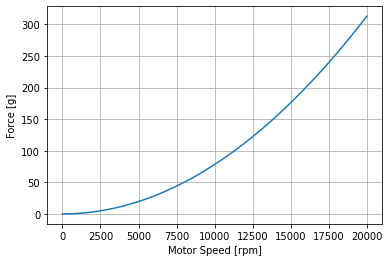

In [5]:
rpm = np.arange(0,20000)
F = 1000*params['kf'] * (rpm2w*rpm)**2 / 9.81
plt.plot(rpm, F)
plt.ylabel("Force [g]")
plt.xlabel("Motor Speed [rpm]")
plt.grid(True);

In [296]:
print(f"Quadcopter mass {params['m']} kg, weight {params['m']*9.81:.2f} N")

ff = 4*params['kf']*1073**2
gg = 1000/9.81*ff
print(f"Total needed thrust force: {ff:.3f} N or {gg:.0f} g")

nn = np.sqrt(params['m']*9.81/params['kf']/4)
print(f"Trim motor settings: {nn*w2rpm:.0f} rpm, {nn:.1f} rad/s")

Quadcopter mass 0.329 kg, weight 3.23 N
Total needed thrust force: 3.224 N or 329 g
Trim motor settings: 10252 rpm, 1073.6 rad/s


In [301]:
class Drone:
    def __init__(self, params=None):
        if params is None:
            params = {}
            raise Exception("No parameters given")
        if not isinstance(params, dict):
            raise Exception("Parameters are not a dictionary")
            
        self.m = params.get('m', 1)
        self.gg = params['km'] / params['kf']
        self.J = params['J']
        self.kf = params['kf']
        self.L = params['l']
        # self.g = 9.81
        
        self.q = Quaternion()
        
    def pd(self, state):
        # x = [p,v,w,q] => 13
        kp = 300 # 300
        kd = 40  # 40
        
        qq = Quaternion(*state[-4:])
        att = np.array(qq.to_euler())
        w = np.array(state[6:9])
        ur = (kp*att + kd*w)
        
        m = np.array([
            [1,-1, 1, 1, 1],
            [1, 1,-1, 1, 1],
            [1, 1, 1,-1, 1],
            [1,-1,-1,-1, 1]
        ])
        
        # trim = 1070 # rad/s
        trim = np.sqrt(self.m*9.81/self.kf/4)
        uh = 0
        pos = state[:3]
        vel = state[3:6]
        uh = (300 * (pos[2]) + 300*vel[2])
        
        uu = np.zeros(5)
        uu[0] = trim
        uu[1:4] = -ur
        uu[4] = uh
        
        u = m @ uu
        
        # saturate control command
        sat = 20000*rpm2w
        for i, x in enumerate(u):
            if x < 0:
                u[i] = -x
            if x > sat:
                u[i] = sat
        
        return u
            
    def model(self, t, x, u):
        """
        x = [p,v,w,q] => 13
        """
        gg = self.gg
        kf = self.kf
        L = self.L
        m = self.m
        
        p,q,r = x[6:9] 
        
        n1,n2,n3,n4 = u
        
        # R converts body to inertial
        R = np.array(self.q.to_rot())
        # convert inertial gravity to body frame, hence R.T
        g = R.T @ np.array([0,0,9.81])
        # roll, pitch, _ = self.q.to_euler()
        # # roll *= -1
        # # pitch *= -1
        # gf = 9.81
        # g = np.array([
        #     -gf*sin(pitch),
        #     gf*sin(roll)*cos(pitch),
        #     gf*cos(roll)*cos(pitch)
        # ])
        
        Jx, Jy, Jz = self.J
        
        F1 = kf*n1**2
        F2 = kf*n2**2
        F3 = kf*n3**2
        F4 = kf*n4**2
        F = np.array([0,0,-F1-F2-F3-F4])
        
        MJ = np.array([
            L*((F2+F3)-(F1+F4))/Jx,
            L*((F1+F3)-(F2+F4))/Jy,
            0.1*(F1+F2-F3-F4)/Jz
        ])
        
        wJw = np.array([
            (Jy - Jz)/Jx*q*r,
            (Jz - Jx)/Jy*p*r,
            (Jx - Jy)/Jz*p*q,
        ])
        
        # ans = [p,v,w,q] => 13
        ans = np.zeros(13)
        
        v = x[3:6]
        w = x[6:9]
        
        ans[:3] = v  # dot pos
        ans[3:6] = F/m+g - np.cross(w,v) # dot vel
        ans[6:9] = MJ-wJw                         # dot w
        
        q = Quaternion(*x[9:])
        w = Quaternion(0,*w)
        ans[9:] = 0.5*q*w # dot q
        
        return ans

In [309]:
step = 0.01
steps = 1000

drone = Drone(params)

y = np.zeros(13)

y[6:9] = 0.,0.,0. # wx, wy, wz [rads/sec]
y[9:] = Quaternion.from_euler(-10,10,40, degrees=True)
t = 0.0

ui = []
yi = []
ti = []

for _ in tqdm(range(steps)):
    # x = [p,v,w,q] => 13
    u = drone.pd(y)
    # u = np.ones(4)*1070
    ui.append(u)
    
    y = rk45(drone.model, [t, t+step], y, args=(u,))
    # print(y)
    if y.success == False:
        print("Oops")
        
    y = y.y[:,-1]
    drone.q = Quaternion(*y[9:])
    ti.append(t)
    yi.append(y)
    # ui.append(u)
    t += step
    
# print(f"{len(ui)}")

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 704.63it/s]


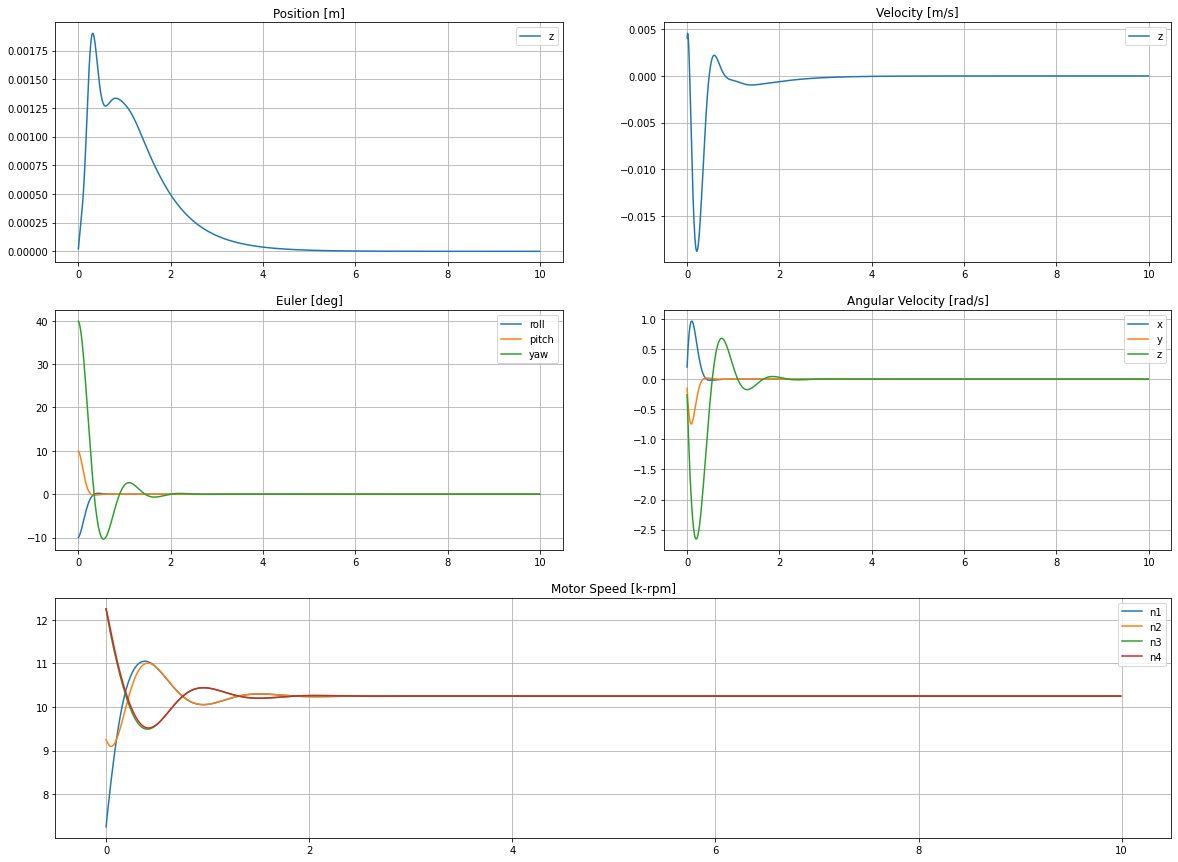

In [310]:
p = []
v = []
w = []
euler = []
for y in yi:
    q = Quaternion(*y[9:])
    euler.append(q.to_euler(True))
    R = q.to_rot()
    p.append(R @ y[:3])   # position [m]
    v.append(R @ y[3:6])  # velocity [m/s]
    w.append(y[6:9])  # w [rads/s]
v = np.array(v)
w = np.array(w)
p = np.array(p)
u = np.array(ui)/1000*w2rpm # rad/s -> rpm
euler = np.array(euler)

plt.subplots(figsize=(20,15))

plt.subplot(3,2,1)
# plt.plot(ti, p[:,0], label="x")
# plt.plot(ti, p[:,1], label="y")
plt.plot(ti, -p[:,2], label="z")
plt.legend()
plt.title('Position [m]')
plt.grid(True)

plt.subplot(3,2,2)
# plt.plot(ti, v[:,0], label="x")
# plt.plot(ti, v[:,1], label="y")
plt.plot(ti, -v[:,2], label="z")
plt.legend()
plt.title('Velocity [m/s]')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(ti, euler[:,0], label="roll")
plt.plot(ti, euler[:,1], label="pitch")
plt.plot(ti, euler[:,2], label="yaw")
plt.legend()
plt.title('Euler [deg]')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(ti, w[:,0], label="x")
plt.plot(ti, w[:,1], label="y")
plt.plot(ti, w[:,2], label="z")
plt.legend()
plt.title('Angular Velocity [rad/s]')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(ti, u[:,0], label="n1")
plt.plot(ti, u[:,1], label="n2")
plt.plot(ti, u[:,2], label="n3")
plt.plot(ti, u[:,3], label="n4")
plt.legend()
plt.title('Motor Speed [k-rpm]')
plt.grid(True)

# plt.subplot(1,3,3)
# plt.plot(ui);